In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
#load the data and selection the data of level=1000 as the pracrice data ds_1000
ds = xr.open_dataset("wspd.mon.mean.nc", engine="netcdf4")
ds_1000=ds.sel(level=1000)
ds_1000

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 841)
Coordinates:
    level    float32 1e+03
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-01-01
Data variables:
    wspd     (time, lat, lon) float32 ...
Attributes:
    title:          monthly mean wind speed from 4-times daily u and v from t...
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 23:05:54 1999: ncrcat wspd.mon.mean.nc /Datase...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

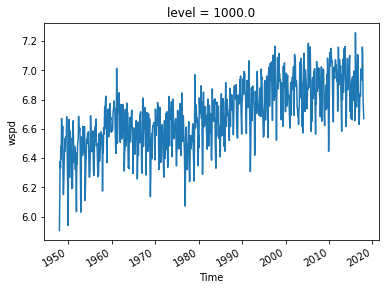

In [6]:
#3.1
#monthly seasonal cycle removed
group_data = ds_1000.wspd.groupby('time.month')

#plot
#a time series of global mean wind speed
group_data.mean(dim=('lat','lon')).plot()


Text(0.5, 1.0, 'Anomalies')

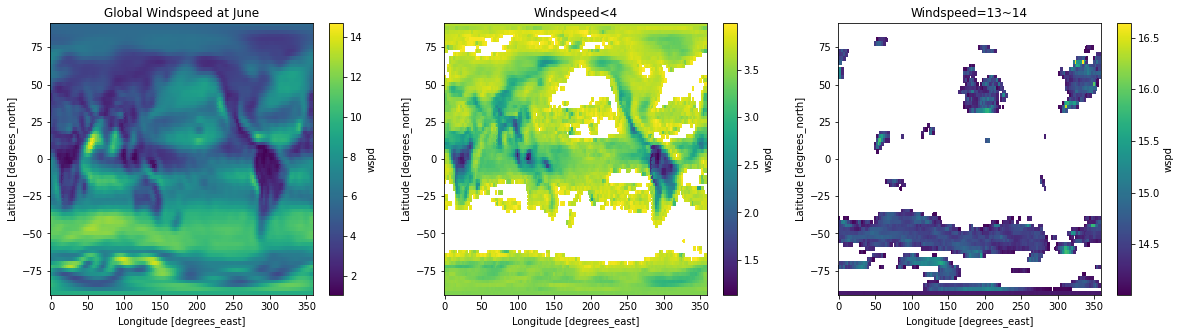

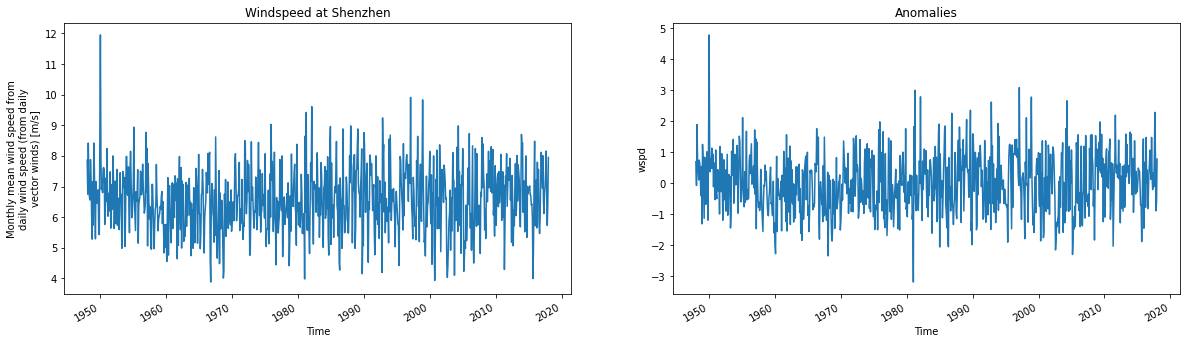

In [7]:
#3.2
#global windspeed at June
wspd_june = ds_1000.wspd.groupby('time.month').mean().sel(month=6)

# Time series of  windspeed at Shenzhen
wspd_ShenZhen=ds_1000.wspd.sel(lon=294.1, lat=22.5, method='nearest')

#the anomalies
group_data = ds_1000.wspd.groupby('time.month')
wspd_anom = group_data - group_data.mean(dim='time')

# Sample data where Windspeed is lower than 4
masked_sample1 = ds_1000.wspd.where(ds_1000['wspd'] < 4 )

# Sample data where Windspeed is between 13 and 14
masked_sample2 = ds_1000.wspd.where((ds_1000['wspd'] > 13 )&(ds_1000['wspd'] > 14))

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5),sharey=False)
wspd_june.plot(ax=ax1)
masked_sample1.mean(dim='time').plot(ax=ax2)
masked_sample2.mean(dim='time').plot(ax=ax3)
ax1.set_title('Global Windspeed at June'); ax2.set_title('Windspeed<4'); ax3.set_title('Windspeed=13~14');


fig,(ax4,ax5) = plt.subplots(1,2, figsize=(20,5),sharey=False)
wspd_ShenZhen.plot(ax=ax4)
wspd_anom.sel(lon=294.1, lat=22.5, method='nearest').plot(ax=ax5)
ax4.set_title('Windspeed at Shenzhen'); ax5.set_title('Anomalies')
